<a href="https://colab.research.google.com/github/piyush5566/Behavioral-Intrusion-Detection-in-Network-Traffic/blob/master/npbo_pearson_correlation_LABEL_POLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=[False,True]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-NPBOv2.rar" "/content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-NPBOv2.rar

Extracting  /content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-NBPOv2.csv       0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 8

##Data Preprocessing

In [ ]:
data=(pd.read_csv("/content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-NBPOv2.csv",sep=';',index_col='id'))
      
data=data.drop([c for c in list(data) if data[c].nunique() is 1],axis=1)#dropping columns with number of unique values = 1

In [ ]:
data.head()

,label_2,label_poly,label_poly_o,srcIP,dstIP,srcPort,dstPort,srcMAC,dstMAC,srcIPInVlan,dstIPInVlan,finCnt<In>,synCnt<In>,rstCnt<In>,pshCnt<In>,ackCnt<In>,urgCnt<In>,eceCnt<In>,cwrCnt<In>,rstAckCnt<In>,finCnt<Out>,synCnt<Out>,rstCnt<Out>,pshCnt<Out>,ackCnt<Out>,urgCnt<Out>,eceCnt<Out>,cwrCnt<Out>,rstAckCnt<Out>,finCnt<All>,synCnt<All>,rstCnt<All>,pshCnt<All>,ackCnt<All>,urgCnt<All>,eceCnt<All>,cwrCnt<All>,rstAckCnt<All>,TSesStart,TSesEnd,...,gaussProds8All[2],gaussProds8All[3],gaussProds8All[4],gaussProds8All[5],gaussProds8All[6],gaussProds8All[7],polynomIndexes3ordAllNeg[0],polynomIndexes3ordAllNeg[1],polynomIndexes3ordAllNeg[2],polynomIndexes3ordAllNeg[3],gaussProds8AllNeg[0],gaussProds8AllNeg[1],gaussProds8AllNeg[2],gaussProds8AllNeg[3],gaussProds8AllNeg[4],gaussProds8AllNeg[5],gaussProds8AllNeg[6],gaussProds8AllNeg[7],fourCoefsGonModulAllNeg[0],fourCoefsGonModulAllNeg[1],fourCoefsGonModulAllNeg[2],fourCoefsGonModulAllNeg[3],fourCoefsGonModulAllNeg[4],fourCoefsGonModulAllNeg[5],fourCoefsGonModulAllNeg[6],fourCoefsGonModulAllNeg[7],fourCoefsGonModulAllNeg[8],fourCoefsGonModulAllNeg[9],fourCoefsGonAngleNeg[0],fourCoefsGonAngleNeg[1],fourCoefsGonAngleNeg[2],fourCoefsGonAngleNeg[3],fourCoefsGonAngleNeg[4],fourCoefsGonAngleNeg[5],fourCoefsGonAngleNeg[6],fourCoefsGonAngleNeg[7],fourCoefsGonAngleNeg[8],fourCoefsGonAngleNeg[9],label,id.1
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,3_Other,3_Other,3.125.56.111,3.125.56.202,33772,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427861e+09,1.427861e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100492
2,False,3_Other,3_Other,3.128.56.111,3.128.56.202,60895,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427861e+09,1.427861e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100496
3,False,3_Other,3_Other,3.129.56.111,3.129.56.202,35776,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427862e+09,1.427862e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100502
4,False,3_Other,3_Other,3.131.56.111,3.131.56.202,43105,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427862e+09,1.427863e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100509
5,False,3_Other,3_Other,3.139.56.111,3.139.56.202,56987,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427893e+09,1.427893e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100517


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11445 entries, 1 to 11445
Columns: 901 entries, label_2 to id.1
dtypes: bool(5), float64(330), int64(560), object(6)
memory usage: 78.4+ MB


In [ ]:
data.describe()

,srcPort,dstPort,finCnt<In>,synCnt<In>,rstCnt<In>,pshCnt<In>,ackCnt<In>,urgCnt<In>,eceCnt<In>,cwrCnt<In>,rstAckCnt<In>,finCnt<Out>,synCnt<Out>,rstCnt<Out>,pshCnt<Out>,ackCnt<Out>,urgCnt<Out>,eceCnt<Out>,cwrCnt<Out>,rstAckCnt<Out>,finCnt<All>,synCnt<All>,rstCnt<All>,pshCnt<All>,ackCnt<All>,urgCnt<All>,eceCnt<All>,cwrCnt<All>,rstAckCnt<All>,TSesStart,TSesEnd,SessDuration,BPerSecIn,BPerSecOut,BPerSesIn,BPerSesOut,PktPerSIn,PktPerSOut,PktPerSesIn,PktPerSesOut,...,gaussProds8All[2],gaussProds8All[3],gaussProds8All[4],gaussProds8All[5],gaussProds8All[6],gaussProds8All[7],polynomIndexes3ordAllNeg[0],polynomIndexes3ordAllNeg[1],polynomIndexes3ordAllNeg[2],polynomIndexes3ordAllNeg[3],gaussProds8AllNeg[0],gaussProds8AllNeg[1],gaussProds8AllNeg[2],gaussProds8AllNeg[3],gaussProds8AllNeg[4],gaussProds8AllNeg[5],gaussProds8AllNeg[6],gaussProds8AllNeg[7],fourCoefsGonModulAllNeg[0],fourCoefsGonModulAllNeg[1],fourCoefsGonModulAllNeg[2],fourCoefsGonModulAllNeg[3],fourCoefsGonModulAllNeg[4],fourCoefsGonModulAllNeg[5],fourCoefsGonModulAllNeg[6],fourCoefsGonModulAllNeg[7],fourCoefsGonModulAllNeg[8],fourCoefsGonModulAllNeg[9],fourCoefsGonAngleNeg[0],fourCoefsGonAngleNeg[1],fourCoefsGonAngleNeg[2],fourCoefsGonAngleNeg[3],fourCoefsGonAngleNeg[4],fourCoefsGonAngleNeg[5],fourCoefsGonAngleNeg[6],fourCoefsGonAngleNeg[7],fourCoefsGonAngleNeg[8],fourCoefsGonAngleNeg[9],label,id.1
count,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,1.144500e+04,1.144500e+04,11445.000000,1.144500e+04,1.144500e+04,1.144500e+04,1.144500e+04,11445.000000,11445.000000,11445.000000,11445.000000,...,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,1.144500e+04,11445.000000,1.144500e+04,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000
mean,50308.821931,1748.094277,1.880734,1.094102,0.371778,13.038008,70.116994,0.000175,0.000087,0.000175,70.193097,11.310878,1.039318,1.429795,13.980603,65.744080,0.000262,0.000524,0.000349,65.763215,13.191612,2.133421,1.801573,27.018611,135.861075,0.000437,0.000612,0.000524,135.956313,1.450092e+09,1.450092e+09,17.577020,1.064625e+05,1.697245e+05,5.220914e+04,1.021307e+04,1311.268845,2348.269313,82.628135,84.514985,...,18.415388,21.538060,20.858439,15.748959,10.286078,6.052017,-0.053155,1.829556,-18.039179,29.888410,7.508588,-9.352617,0.188880,-2.702134,-1.552565,0.443639,-0.475539,-0.099704,3.987577e+04,1242.061280,1.123449e+03,949.214623,916.843407,960.128918,1079.772170,1090.548274,956.780772,833.738471,47.512451,-4.087856,-46.695786,17.432604,51.766507,62.966480,68.397987,23.160851,-16.712908,-6.542404,2.929926,32110.901879
std,14365.208957,4477.601754,19.428663,0.429965,0.525236,846.544498,1684.033189,0.013219,0.009347,0.013219,1684.033199,213.576708,0.240570,51.104512,872.939435,1259.444355,0.016189,0.022891,0.018692,1259.446444,214.418726,0.540986,51.146673,1718.839151,2914.520507,0.020898,0.024724,0.022891,2914.522715,1.206432e+07,1.206429e+07,65.369539,3.337446e+05,6.484948e+05,4.218408e+05,1.217885e+05,4778.733702,8718.110519,1694.286651,1278.810047,...,36.361947,43.394417,49.393413,43.346010,21.464179,8.879260,0.130989,4.130563,34.996143,107.427124,7.915972,21.772439,24.586006,16.657352,11.545511,9.797933,8.545108,3.155938,2.928452e+05,12868.185452,1.424278e+04,10038.786515,5920.165364,4336.599603,4785.704411,4447.481577,4646.890927,4518.773

In [ ]:
#check any null value in data
data.isnull().values.any()

False

3_Samba         4641
3_Server        3339
3_Apache         809
3_PostgreSQL     737
3_Other          647
3_MSSQL          532
2_Apache         163
2_MSSQL          103
3_DistCC         100
2_Server         100
1_Apache          61
2_PostgreSQL      45
2_Samba           44
1_MSSQL           31
1_Server          26
2_DistCC          23
1_Samba           19
1_PostgreSQL      13
1_DistCC          12
Name: label_poly, dtype: int64

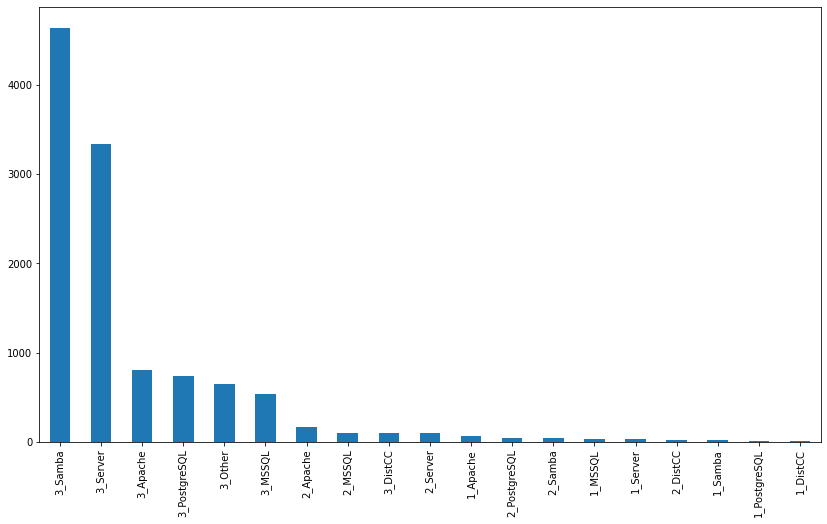

In [ ]:
#visualization of distribution of five classes attack in network flows
count_classes=pd.value_counts(data['label_poly'])
count_classes.plot(kind='bar')
count_classes

In [ ]:
#Encoding 0_apache,0_other,0_postfix,1_apache,1_postfix into labels 0,1,2,3 and 4
le = preprocessing.LabelEncoder()
le.fit(data['label_poly'])
data['label_poly'] = le.transform(data['label_poly'])

In [ ]:
data['label_poly'].head()

id
1    15
2    15
3    15
4    15
5    15
Name: label_poly, dtype: int64

In [ ]:
#Encoding False and True into labels 0 and 1
#le.fit(data['label_2'])
#le.transform(data['label_2'])
#data['label_2'] = le.transform(data['label_2'])

#data.head()

In [ ]:
#Excluding columns like SrcMac with dtype = 'object'
data=data.select_dtypes(exclude = ['object'])
data.head()

,label_2,label_poly,srcPort,dstPort,srcIPInVlan,dstIPInVlan,finCnt<In>,synCnt<In>,rstCnt<In>,pshCnt<In>,ackCnt<In>,urgCnt<In>,eceCnt<In>,cwrCnt<In>,rstAckCnt<In>,finCnt<Out>,synCnt<Out>,rstCnt<Out>,pshCnt<Out>,ackCnt<Out>,urgCnt<Out>,eceCnt<Out>,cwrCnt<Out>,rstAckCnt<Out>,finCnt<All>,synCnt<All>,rstCnt<All>,pshCnt<All>,ackCnt<All>,urgCnt<All>,eceCnt<All>,cwrCnt<All>,rstAckCnt<All>,TSesStart,TSesEnd,SessDuration,BPerSecIn,BPerSecOut,BPerSesIn,BPerSesOut,...,gaussProds8All[2],gaussProds8All[3],gaussProds8All[4],gaussProds8All[5],gaussProds8All[6],gaussProds8All[7],polynomIndexes3ordAllNeg[0],polynomIndexes3ordAllNeg[1],polynomIndexes3ordAllNeg[2],polynomIndexes3ordAllNeg[3],gaussProds8AllNeg[0],gaussProds8AllNeg[1],gaussProds8AllNeg[2],gaussProds8AllNeg[3],gaussProds8AllNeg[4],gaussProds8AllNeg[5],gaussProds8AllNeg[6],gaussProds8AllNeg[7],fourCoefsGonModulAllNeg[0],fourCoefsGonModulAllNeg[1],fourCoefsGonModulAllNeg[2],fourCoefsGonModulAllNeg[3],fourCoefsGonModulAllNeg[4],fourCoefsGonModulAllNeg[5],fourCoefsGonModulAllNeg[6],fourCoefsGonModulAllNeg[7],fourCoefsGonModulAllNeg[8],fourCoefsGonModulAllNeg[9],fourCoefsGonAngleNeg[0],fourCoefsGonAngleNeg[1],fourCoefsGonAngleNeg[2],fourCoefsGonAngleNeg[3],fourCoefsGonAngleNeg[4],fourCoefsGonAngleNeg[5],fourCoefsGonAngleNeg[6],fourCoefsGonAngleNeg[7],fourCoefsGonAngleNeg[8],fourCoefsGonAngleNeg[9],label,id.1
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,15,33772,4444,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427861e+09,1.427861e+09,60.923876,6.631226,8.797864,404,536,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100492
2,False,15,60895,4444,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427861e+09,1.427861e+09,66.138415,36.937686,26.414301,2443,1747,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100496
3,False,15,35776,4444,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427862e+09,1.427862e+09,86.141086,29.904429,22.556019,2576,1943,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100502
4,False,15,43105,4444,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427862e+09,1.427863e+09,60.707780,18.597287,18.086644,1129,1098,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100509
5,False,15,56987,4444,False,False,1,1,0,0,2,0,0,0,2,1,1,0,0,3,0,0,0,3,2,2,0,0,5,0,0,0,5,1.427893e+09,1.427893e+09,60.595572,6.667154,8.845531,404,536,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007726,0.37876,-6.045378,31.199097,7.598851,-2.68241,2.476698,0.0,0.0,0.0,0.0,0.0,132,104.64849,43.276504,3.976932,12.60729,94.021274,210.995602,297.230712,294.090218,183.648527,0,-43.891267,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100517


In [ ]:
data['polynomIndexes3ordAllNeg[0]'].head()

id
1   -0.007726
2   -0.007726
3   -0.007726
4   -0.007726
5   -0.007726
Name: polynomIndexes3ordAllNeg[0], dtype: float64

PEARSON CORRELATION COEFFICIENT

We will use Pearson correlation coefficient to select the features mostly related with the column 'label_2', taking 0.3 as the threshold for selection.

PEARSON CORRELATION COEFFICIENT

We will use Pearson correlation coefficient to select the features mostly related with the column 'label_2', taking 0.3 as the threshold for selection.

In [ ]:
useful_data=data[(c for c in list(data) if data['label_poly'].corr(data[c])>0.3)]
useful_data 

,label_poly,srcPort,rstCnt<In>,TSesStart,TSesEnd,sumSessPerPort,medTTLIn,modTTLIn,meanTTLIn,sigTCPHdrLen,hasFragIp,sumFragPkt,polynomIndexes3ordOut[1],polynomIndexes3ordIn[0],polynomIndexes3ordIn[2],polynomIndexes5ordOut[0],polynomIndexes5ordOut[2],fourCoefsGonAngleNeg[6],label
id,,,,,,,,,,,,,,,,,,,
1,15,33772,0,1.427861e+09,1.427861e+09,1,64.0,64,64.0,1.032796,False,0,8.000000,-2.666667,-2.666667,-0.089025,0.839252,87.155126,3
2,15,60895,0,1.427861e+09,1.427861e+09,1,64.0,64,64.0,1.032796,False,0,8.000000,-2.666667,-2.666667,-0.089025,0.839252,87.155126,3
3,15,35776,0,1.427862e+09,1.427862e+09,1,64.0,64,64.0,1.032796,False,0,8.000000,-2.666667,-2.666667,-0.089025,0.839252,87.155126,3
4,15,43105,0,1.427862e+09,1.427863e+09,1,64.0,64,64.0,1.032796,False,0,8.000000,-2.666667,-2.666667,-0.089025,0.839252,87.155126,3
5,15,56987,0,1.427893e+09,1.427893e+09,1,64.0,64,64.0,1.032796,False,0,8.000000,-2.666667,-2.666667,-0.089025,0.839252,87.155126,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,17,53383,0,1.457006e+09,1.457006e+09,134,128.0,128,128.0,1.032796,False,0,8.000000,-2.666667,-2.666667,-0.089025,0.839252,87.155126,3
11442,18,50931,1,1.456851e+09,1.456851e+09,59,128.0,128,128.0,1.676163,False,0,8.000000,0.592437,-7.815126,-0.089025,0.839252,60.163842,3
11443,18,51090,1,1.456842e+09,1.456842e+09,1244,128.0,128,128.0,1.676163,True,4,8.000000,0.592437,-7.815126,-0.089025,0.839252,60.163842,3


In [ ]:
#dividing data into X and Y
columns=useful_data.columns.tolist()
columns=[c for c in columns if c not in ["label_poly"]]
target="label_poly"
state=np.random.RandomState(42)
X=useful_data[columns]
# X=preprocessing.normalize(useful_data[columns])
Y=useful_data[target].astype(int)
print(X.shape)
print(Y.shape)



(11445, 18)
(11445,)


In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into training and test data with test size 0.25
train_x,test_x,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
#train_x,cv_x,y_train,y_cv = train_test_split(train_x, y_train, test_size=0.25, random_state=42)

In [ ]:
#Dropping all columns with negative columns in X
X_positive = X.loc[:,(X>=0).all()]
(X_positive >= 0).all()

srcPort           True
rstCnt<In>        True
TSesStart         True
TSesEnd           True
sumSessPerPort    True
medTTLIn          True
modTTLIn          True
meanTTLIn         True
sigTCPHdrLen      True
hasFragIp         True
sumFragPkt        True
label             True
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into training and test data with test size 0.25
train_x_pos,test_x_pos,y_train_pos,y_test_pos = train_test_split(X_positive, Y, test_size=0.25, random_state=42)
#train_x_pos,cv_x_pos,y_train_pos,y_cv_pos = train_test_split(train_x_pos, y_train_pos, test_size=0.25, random_state=42)

##Multinomial Naive Bayes, Gaussian Naive Bayes, Support Vector Machine, Random Forest and K Nearest Neighbors(KNN)


In [ ]:
#Creating parameter grid of differnt values we want to try oue model on
param_svm=param_mnb={'alpha':[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
param_rf={'n_estimators':[100,200,500,1000,2000],'max_depth':[5, 10]}
param_knn={'n_neighbors':[5, 11, 15, 21, 31, 41, 51, 99]}

In [ ]:
#preparing a dictionary of 5 classifiers
classifiers={
    #"Isolation Forest":IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=state,verbose=0),
    #"Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,
                                              #contamination=outlier_fraction),
    "Multinomial Naive Bayes":MultinomialNB(), 
    "Gaussian Naive Bayes":GaussianNB(),        
    "Support Vector Machine":SGDClassifier( class_weight='balanced',penalty='l2', loss='hinge', random_state=42),
    "Random Forest":RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1),
    "K Nearest Neighbours":KNeighborsClassifier()
}

In [ ]:
#n_outliers=count_classes[0]

for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name=='Multinomial Naive Bayes':
        gs_clf = GridSearchCV(clf,param_mnb,scoring='f1_weighted')
        gs_clf.fit(train_x_pos,y_train_pos)#training Multinomial Naive Bayes classifier only on non-negative data
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)   
        y_pred=gs_clf.predict(test_x_pos)
        print("Classification report :")
        print(classification_report(y_test_pos,y_pred))
        pd.DataFrame(y_pred,y_test).to_csv("output"+clf_name+".csv")
    elif clf_name=='Gaussian Naive Bayes':
        gs_clf = GridSearchCV(clf,{},scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)   
    elif clf_name=='Support Vector Machine':
        gs_clf = GridSearchCV(clf,param_svm,scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_) 
    elif clf_name=='Random Forest':
        gs_clf = GridSearchCV(clf,param_rf,scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)   
    else:
        gs_clf = GridSearchCV(clf,param_knn,scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)  
    #y_pred[y_pred==1]=0
    #y_pred[y_pred==-1]=1
    #n_errors=(y_pred!=Y).sum()
    #print("{}:{}".format(clf_name,n_errors))
    
    #print("Accuracy Score :")
    #print(accuracy_score(Y,y_pred))
    if clf_name != 'Multinomial Naive Bayes':
        y_pred = gs_clf.predict(test_x)
        print("Classification report :")
        print(classification_report(y_test,y_pred))
        pd.DataFrame(y_pred,y_test).to_csv("output"+clf_name+".csv")

MULTINOMIAL NAIVE BAYES

Cross-Validation Weighted Average of f1 :  0.5392270990233775
Classification report :
              precision    recall  f1-score   support

           0       0.33      0.10      0.15        10
           1       0.00      0.00      0.00         3
           2       0.01      0.11      0.02         9
           3       0.00      0.00      0.00         2
           4       0.07      0.25      0.11         4
           5       0.04      0.20      0.06         5
           6       0.07      0.09      0.08        33
           7       0.00      0.00      0.00         6
           8       0.40      0.09      0.14        23
           9       0.17      0.06      0.09        16
          10       0.01      0.06      0.02        16
          11       1.00      0.04      0.07        27
          12       0.41      0.09      0.15       204
          13       0.16      0.97      0.27        29
          14       0.24      0.24      0.24       144
          15       0.00 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SUPPORT VECTOR MACHINE

Cross-Validation Weighted Average of f1 :  0.025996121505594834
Classification report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00       204
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00       144
          15       0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RANDOM FOREST

Cross-Validation Weighted Average of f1 :  0.9930197872775717
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00         3
           2       1.00      0.89      0.94         9
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       0.97      0.97      0.97        33
           7       1.00      1.00      1.00         6
           8       0.96      1.00      0.98        23
           9       0.94      1.00      0.97        16
          10       0.94      1.00      0.97        16
          11       1.00      1.00      1.00        27
          12       1.00      0.97      0.99       204
          13       0.66      1.00      0.79        29
          14       1.00      1.00      1.00       144
          15       0.99      1.00 